# TP 3 : Le réchauffement climatique (sur la région rennaise)

# 1) Imports

## 1) a-] Importez les libraries suivantes

* numpy
* matplotlib
* pandas
* scipy (module stats)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.linear_model import LinearRegression

%matplotlib inline

## 1) b-] Importez les données sous forme de dataframe, et affichez les cinq premières lignes

Pensez à enlever le texte au dessus des données dans le fichier texte.

On pourra utiliser numpy dans un premier temps, puis utliser pandas pour transformer le tableau en dataframe.

In [2]:
data = np.loadtxt('st_jacques.txt', delimiter=',', dtype=int)
temp = pd.DataFrame(data, columns = ['station_id', 'source_id', 'date', 'temp_dixieme', 'quality_code'])
temp

,station_id,source_id,date,temp_dixieme,quality_code
0,322,6713,19450101,30,0
1,322,6713,19450102,13,0
2,322,6713,19450103,38,0
3,322,6713,19450104,20,0
4,322,6713,19450105,41,0
...,...,...,...,...,...
27357,322,907130,20191126,125,0
27358,322,907130,20191127,118,0
27359,322,907130,20191128,115,0
27360,322,907130,20191129,92,0


# 2) Qualité des données

## 2) a-] Trouvez les données manquantes ou suspectes dans le jeu de données, et enlevez-les.

Pensez à utiliser la variable quality code, qui contient des informations sur la qualité des données.

* 30-34 Q_TG : quality code for TG (0='valid'; 1='suspect'; 9='missing')

In [3]:
temp.query('quality_code!=0')

,station_id,source_id,date,temp_dixieme,quality_code
21400,322,907130,20030805,318,1
26866,322,907130,20180723,-9999,9
26867,322,907130,20180724,-9999,9
26868,322,907130,20180725,-9999,9
26869,322,907130,20180726,-9999,9
26870,322,907130,20180727,-9999,9
26871,322,907130,20180728,-9999,9
26872,322,907130,20180729,-9999,9
26873,322,907130,20180730,-9999,9
26874,322,907130,20180731,-9999,9


Principalement des données manquantes de juillet-août 2018, et une donnée suspecte de 2003.

In [4]:
temp = temp.query('quality_code==0')
temp.head()

,station_id,source_id,date,temp_dixieme,quality_code
0,322,6713,19450101,30,0
1,322,6713,19450102,13,0
2,322,6713,19450103,38,0
3,322,6713,19450104,20,0
4,322,6713,19450105,41,0


In [5]:
temp

,station_id,source_id,date,temp_dixieme,quality_code
0,322,6713,19450101,30,0
1,322,6713,19450102,13,0
2,322,6713,19450103,38,0
3,322,6713,19450104,20,0
4,322,6713,19450105,41,0
...,...,...,...,...,...
27357,322,907130,20191126,125,0
27358,322,907130,20191127,118,0
27359,322,907130,20191128,115,0
27360,322,907130,20191129,92,0


## 2) b-] Est-ce qu'il y a des données ne correspondant pas à la station de Saint Jacques de la Lande dans le jeu de données?

Identifiant de la station de Saint-Jacques : 322

In [6]:
temp.query('station_id!=322')

,station_id,source_id,date,temp_dixieme,quality_code


Non, il n'y en a pas!

## 2) c-] Combien de sources différentes ont contribué au jeu de données? Laquelle a le plus contribué aux mesures?

Pensez à unique de pandas

In [7]:
sources_id = temp['source_id'].unique()
for i in range(len(sources_id)):
    print('Source ', str(sources_id[i]), ': ', len(temp.query("source_id=="+str(sources_id[i]))), ' mesures')

Source  6713 :  26662  mesures
Source  907130 :  679  mesures


Il y a deux sources; la source d'identifiant 6713 a constitué la majorité du dataset

# 3) Mise en forme des données


## 3) a-] Les données de température sont en dixième de degrés. Créez une variable contenant la température en degrés.

In [8]:
temp = temp.assign(temp=temp['temp_dixieme']/10)
temp.head()

,station_id,source_id,date,temp_dixieme,quality_code,temp
0,322,6713,19450101,30,0,3.0
1,322,6713,19450102,13,0,1.3
2,322,6713,19450103,38,0,3.8
3,322,6713,19450104,20,0,2.0
4,322,6713,19450105,41,0,4.1


## 3) b-] Extraire de la date l'année associée à chaque mesure de température et créez une variable annee. Idem pour le jour.

In [9]:
date = temp['date']
temp['annee'] = [int(str(d)[0:4]) for d in date]
temp['jour'] = [int(str(d)[6:]) for d in date]
temp.head()

,station_id,source_id,date,temp_dixieme,quality_code,temp,annee,jour
0,322,6713,19450101,30,0,3.0,1945,1
1,322,6713,19450102,13,0,1.3,1945,2
2,322,6713,19450103,38,0,3.8,1945,3
3,322,6713,19450104,20,0,2.0,1945,4
4,322,6713,19450105,41,0,4.1,1945,5


##  3) c-] Extraire de la date le mois associé à chaque mesure de température et créez une variable qui contient le libellé du mois (janvier, février, etc.)

In [10]:
mois = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 
        'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']

temp['mois'] = [mois[int(str(d)[4:6])-1] for d in temp['date']]
temp.head()

,station_id,source_id,date,temp_dixieme,quality_code,temp,annee,jour,mois
0,322,6713,19450101,30,0,3.0,1945,1,janvier
1,322,6713,19450102,13,0,1.3,1945,2,janvier
2,322,6713,19450103,38,0,3.8,1945,3,janvier
3,322,6713,19450104,20,0,2.0,1945,4,janvier
4,322,6713,19450105,41,0,4.1,1945,5,janvier


## 3) d-] Ne conserver que les variables date, annee, mois, jour et température en degree

In [11]:
temp = temp[['date','annee', 'mois', 'jour', 'temp']]
temp.head()

,date,annee,mois,jour,temp
0,19450101,1945,janvier,1,3.0
1,19450102,1945,janvier,2,1.3
2,19450103,1945,janvier,3,3.8
3,19450104,1945,janvier,4,2.0
4,19450105,1945,janvier,5,4.1


À partir de cette section, les parties 4), 5) et 6) sont indépendantes et peuvent se faire dans n'importe quel ordre.

# 4) Statistiques descriptives des données

## 4) a-] Est-ce qu'il a neigé pendant plusieurs jours de suite en 2015?

On pourra utiliser idxmin.

In [12]:
indice_min = temp.query("annee==2015")['temp'].idxmin()
temp.loc[indice_min]

date     20150206
annee        2015
mois      février
jour            6
temp          1.2
Name: 25603, dtype: object

Non, il n'a pas pu neiger plusieurs jours de suite en 2015 (température journalière minimale sur l'année > 0°C)


## 4) b-] En été 2019, la France a connu deux périodes de canicule, une en juin et une en juillet. Selon les données, laquelle a été la plus chaude?

In [13]:
indice_max = temp.query("annee==2019")['temp'].idxmax()
temp.loc[indice_max]

date     20190628
annee        2019
mois         juin
jour           28
temp         28.8
Name: 27206, dtype: object

In [14]:
temp.query("annee==2019").query("mois=='juillet'")['temp'].max()

27.9

Celle de fin juin, avec presque un degré de plus que celle de juillet


# 5) Visualisation des données


## 5) a-] Affichez un nuage de points représentant l'ensemble des températures de l'année 1970 dans l'ordre chronologique.

### Bonus :

* Au lieu d'afficher toutes les dates en abcsisses, affichez seulement les noms des mois à la place du 15ème jour du mois (par exemple, affichez 'janvier' au lieu de '19700115'). On pourra utiliser spécifier les dates à garder avec plt.xticks, et changer leurs valeurs à l'aide de set_xticklabels.

* Et donnez une couleur à chaque saison, en ajoutant une légende.

Délimiteurs de saisons:

* Le 1er janvier par 'Hiver'
* Le 21 mars par 'Printemps'
* Le 21 juin par 'Été'
* Le 23 septembre par 'Automne'
* Le 22 décembre par 'Hiver'

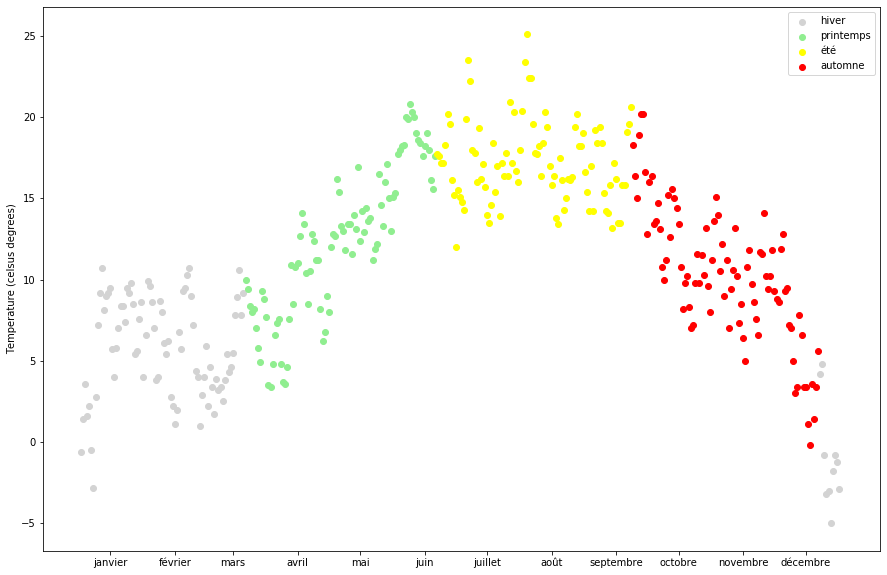

In [15]:
temp1970 = temp.query("annee==1970")
t = temp1970['temp']
d = np.array(temp1970['date'], str)

indice_hiver1 = 0
#solution 1 pour trouver les indices
indice_printemps = np.where(d=='19700321')[0][0]
#solution 2 pour trouver les indices
indice_ete = np.argmax(d=='19700621')
indice_automne = np.argmax(d=='19700923')
indice_hiver2 = np.argmax(d=='19701222')
n = len(temp1970)

def milieu_mois():
    res = []
    for i in np.arange(1,13):
        if i <10:
            res.append('19700'+str(i)+'15')
        else:
            res.append('1970'+str(i)+'15')
    return res

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

ax.set_xticklabels(mois)

plt.scatter(d[indice_hiver1:indice_printemps], t[indice_hiver1:indice_printemps], 
            c= 'lightgrey', label = 'hiver')
plt.scatter(d[indice_printemps:indice_ete],t[indice_printemps:indice_ete], 
            c ='lightgreen',label= 'printemps')
plt.scatter(d[indice_ete:indice_automne],t[indice_ete:indice_automne], 
            c ='yellow', label = 'été')
plt.scatter(d[indice_automne:indice_hiver2],t[indice_automne:indice_hiver2], 
            c ='red', label = 'automne')
plt.scatter(d[indice_hiver2:n],t[indice_hiver2:n], c ='lightgrey')
plt.legend()
plt.ylabel('Temperature (celsus degrees)')
plt.xticks(milieu_mois())
plt.show()

## 5) b-] Affichez sur la même figure un boxplot des températures de janvier 1948, et un boxplot des températures de janvier 2019

Comparez les distributions de températures des deux mois considérés.

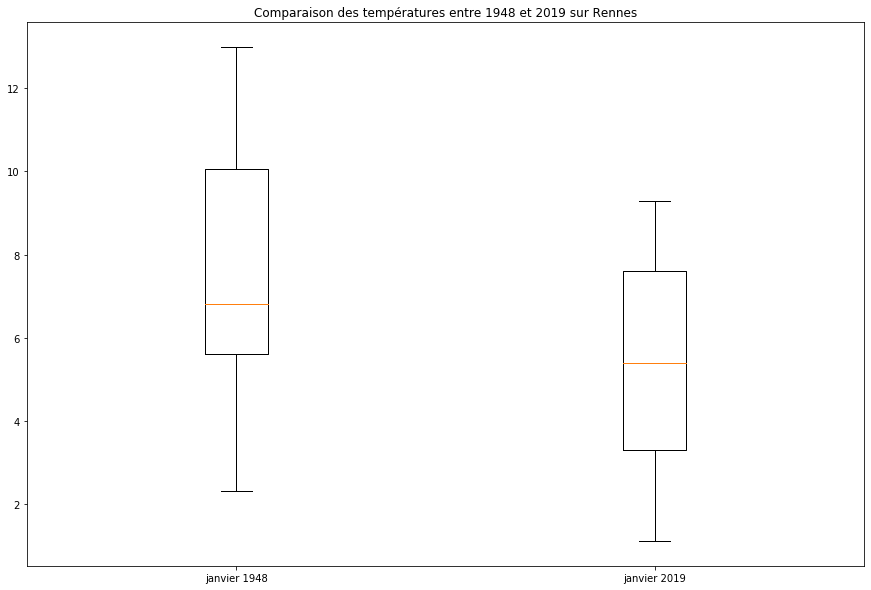

In [16]:
temp_janv_1948 = temp.query("annee==1948").query("mois=='janvier'")['temp']
temp_janv_2019 = temp.query("annee==2019").query("mois=='janvier'")['temp']

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

ax.set_xticklabels(['janvier 1948','janvier 2019'])

plt.title('Comparaison des températures entre 1948 et 2019 sur Rennes')
plt.boxplot((temp_janv_1948, temp_janv_2019))
plt.show()

In [17]:
np.median(temp_janv_1948)-np.median(temp_janv_2019)

1.3999999999999995

In [18]:
np.mean(temp_janv_1948)-np.mean(temp_janv_2019)

2.048387096774193

Janvier 1948 est un mois d'hiver moins rigoureux que janvier 2019. La température médiane de janvier 1948 est supérieure de 1.4°C à celle de janvier 2019. La température moyenne de janvier 1948 est supérieure de 2°C à celle de janvier 2019.

# 6) Méthodes et tests statistiques


## 6) a-] Créez un tableau contenant toutes les températures moyennes par année, de 1945 à 2019, puis affichez ces données sous forme graphique

In [19]:
annee = np.arange(1945, 2020, 1)
temp_annee = temp.groupby('annee')['temp'].mean()
temp_annee

annee
1945    11.808219
1946    10.703562
1947    11.736164
1948    11.354098
1949    12.206301
          ...    
2015    12.627945
2016    12.154098
2017    12.547671
2018    12.569275
2019    13.304491
Name: temp, Length: 75, dtype: float64

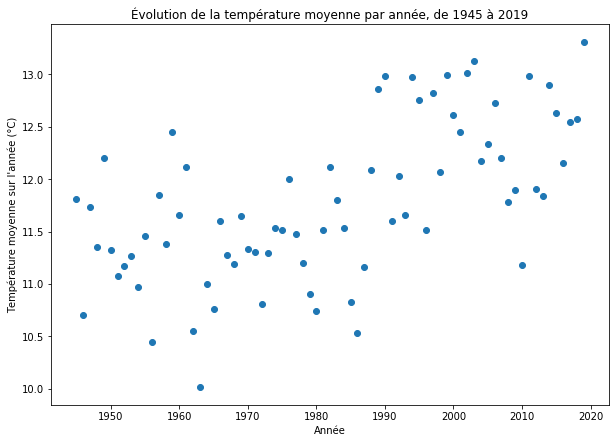

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(annee, temp_annee)
plt.title('Évolution de la température moyenne par année, de 1945 à 2019')
plt.xlabel('Année')
plt.ylabel("Température moyenne sur l'année (°C)")
plt.show()

## 6) b-] Trouvez la droite de régression correspondant au graphe précédent

In [21]:
t = np.array(temp_annee).reshape(-1,1)

reg = LinearRegression()
reg.fit(np.array(annee).reshape(-1,1), t)

droite_reg = np.array(reg.coef_*annee+reg.intercept_).reshape(-1,1)

print("Coefficient de la droite de régression", reg.coef_)
print("Constante de régression", reg.intercept_)

Coefficient de la droite de régression [[0.02078358]]
Constante de régression [-29.41590481]


## 6) c-] Affichez cette droite sur le graphique précédent, puis prévoyez la température moyenne pour 2045, et calculez la différence de températures observées entre 1945 et 2045

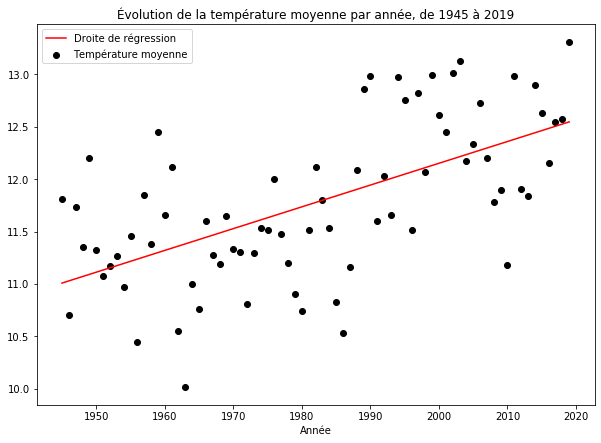

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(annee, temp_annee, c="black", label= 'Température moyenne')
plt.plot(annee, droite_reg, c="red", label = 'Droite de régression')
plt.title('Évolution de la température moyenne par année, de 1945 à 2019')
plt.xlabel('Année')
plt.legend()
plt.show()

In [23]:
pred2045 = reg.coef_*2045+reg.intercept_

pred2045-temp_annee.values[0]

array([[1.27829675]])

## 6) d-] Donald est climatosceptique.


In [24]:
from IPython.display import Image

Image[filename="donald.png", width=200, height=200]

 ![title](donald.png)

![title](donald.png)

### Il pense qu'il n'y a pas de différence significative de températures moyennes entre la période 1945-1965 et la période 1999-2019. En tant que scientifique, et à l'aide des données, que pouvez-vous lui répondre concernant la région de Rennes?

On pourra utiliser un t-test d'indépendance.

In [25]:
temp4565 = temp_annee[0:20]
moy4565 = np.mean(temp4565)

temp9919 = temp_annee[len(temp_annee)-20:len(temp_annee)]
moy9919 = np.mean(temp9919)

In [26]:
scipy.stats.ttest_ind(temp9919, temp4565)

Ttest_indResult(statistic=5.958489745339041, pvalue=6.490398060532384e-07)

On rejette l'hypothèse nulle d'égalité des moyennes, celles-ci sont significativement différentes pour les deux périodes

In [27]:
print("Pour Rennes (Saint-Jacques), la moyenne de température sur "+
      "la période 1999-2019 est supérieure à celle de la période 1945-1965 :", 
      moy9919>moy4565, "d'environ" , np.round(10*(moy9919-moy4565))/10, "degré.")

Pour Rennes (Saint-Jacques), la moyenne de température sur la période 1999-2019 est supérieure à celle de la période 1945-1965 : True d'environ 1.1 degré.


# 7) Graphe dynamique

Créez un diagramme en radars dynamique affichant les températures de chaque année au fur et à mesure du temps, entre 1945 et 2018.

On mettra à jour le titre du graphe et on ajoutera les données pour chaque année.

Pensez à %matplotlib qt pour autoriser l'affichage d'une fenêtre extérieure et plt.ion() pour rendre le graphe dynamique!

Bon courage ;-)

Quelques sources d'inpirations:

* https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
* https://stackoverflow.com/questions/4098131/how-to-update-a-plot-in-matplotlib

In [35]:
temp['m'] = [str(d)[4:6] for d in temp['date']]

temp_ma = temp.query("annee!=2019").groupby(['annee', 'm']).mean()['temp']
temp_ma
index_ma = temp_ma.index
#index_ma

In [36]:
df = pd.DataFrame(np.array(temp_ma).reshape(74,12), 
                   columns = temp_ma.index.levels[1]).set_index(temp_ma.index.levels[0])
df

m,01,02,03,04,05,06,07,08,09,10,11,12
annee,,,,,,,,,,,,
1945,0.867742,8.882143,8.616129,12.356667,14.058065,16.686667,18.387097,17.732258,16.703333,13.080645,7.713333,6.532258
1946,1.541935,7.925000,7.358065,11.230000,12.190323,13.946667,18.070968,16.593548,15.753333,11.558065,9.186667,3.054839
1947,2.290323,2.271429,7.796774,11.290000,14.525806,16.840000,19.274194,20.983871,17.510000,11.812903,9.913333,5.687097
1948,7.548387,5.796552,10.738710,10.403333,13.654839,15.260000,17.058065,17.122581,14.930000,10.764516,7.630000,5.074194
1949,6.096774,6.235714,7.025806,11.443333,11.741935,17.280000,20.432258,19.548387,18.913333,14.122581,7.333333,5.922581
...,...,...,...,...,...,...,...,...,...,...,...,...
2014,7.774194,7.996429,9.238710,11.663333,13.438710,17.086667,19.577419,17.322581,17.920000,14.761290,10.686667,7.025806
2015,6.203226,5.039286,8.448387,12.303333,13.596774,17.183333,19.454839,19.006452,14.856667,12.383871,12.050000,10.464516
2016,7.161290,7.196552,7.348387,9.380000,14.235484,16.823333,18.838710,19.983871,18.970000,11.509677,8.476667,5.767742


In [37]:
#enable interactive graphs
%matplotlib qt

# number of variable
categories=list(df)
N = len(categories)

plt.ion()
plt.figure(figsize=(10,10))
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
ax.set_xticklabels(mois)

mois_ord = ['janvier', 'février' , 'mars', 'avril','mai', 'juin','juillet', 
            'août', 'septembre', 'octobre','novembre','décembre']

# Draw one axe per variable + add labels labels yet
plt.xticks(angles, mois_ord , color='grey', size=15)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,5,10,15,20], ["0","5","10","15","20"], color="red", size=12)
plt.ylim(0,25)

# Plot data
for i in range(74):
    values = df.iloc[i].values
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.title("Diagramme en radar de l'évolution des températures au cours du temps sur Saint-Jacques - Année "+str(annee[i]))
    plt.pause(0.5)

ax.fill(angles, values, 'b', alpha=0)
plt.savefig("question7.png")
plt.show()